# Entrenamiento y testeo de modelo supervisado de  Machine Learning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
from IPython.display import clear_output

In [3]:
# Importo mis datos transformados y los ingesto en un DataFrame. 
train = pd.read_csv(r'train_clean.csv', header=0)

In [4]:
train

,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,target
0,house,1200,2,2.0,1,1,1,0,0,0,43.5851,-116.2250,0
1,apartment,694,1,1.0,1,1,1,0,0,0,38.9137,-104.7800,0
2,apartment,900,2,2.0,0,0,1,0,0,0,36.7922,-76.1643,0
3,house,1469,3,2.0,1,1,1,0,0,0,33.5623,-112.0560,0
4,apartment,700,1,1.0,1,1,1,0,0,0,36.0595,-86.6592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244790,apartment,1054,2,2.0,1,1,0,0,0,0,27.9523,-82.4476,0
244791,apartment,600,2,1.0,1,1,0,0,0,0,43.7198,-98.0187,1
244792,apartment,1099,2,2.0,1,1,1,0,0,0,32.6279,-117.0370,0
244793,apartment,1050,2,2.0,0,0,0,0,0,0,48.1995,-101.2800,1


## Últimos ajustes de los datos antes de crear el modelo de ML

Creo las variables dummies

In [5]:
train = pd.get_dummies(train)

Dado que en el set de testeo en el campo 'type' no existen las categorías 'assisted living' y 'land' al crear las variables dummies obtengo un DataFrame con dos columnas menos y al entrenar el modelo la dimensionalidad del set de entrenamiento no coincide con la del set de testeo por lo que procedo a  eliminar las columnas  'type_assisted living' y 'type_land' del set de entrenamiento. 

In [6]:
 train.drop('type_assisted living', axis=1, inplace=True)

In [7]:
train.drop('type_land' , axis=1, inplace=True)

Rectifico los cambios

In [8]:
train.shape

(244795, 22)

In [9]:
train

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,type_apartment,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse
0,1200,2,2.0,1,1,1,0,0,0,43.5851,...,0,0,0,0,0,1,0,0,0,0
1,694,1,1.0,1,1,1,0,0,0,38.9137,...,1,0,0,0,0,0,0,0,0,0
2,900,2,2.0,0,0,1,0,0,0,36.7922,...,1,0,0,0,0,0,0,0,0,0
3,1469,3,2.0,1,1,1,0,0,0,33.5623,...,0,0,0,0,0,1,0,0,0,0
4,700,1,1.0,1,1,1,0,0,0,36.0595,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244790,1054,2,2.0,1,1,0,0,0,0,27.9523,...,1,0,0,0,0,0,0,0,0,0
244791,600,2,1.0,1,1,0,0,0,0,43.7198,...,1,0,0,0,0,0,0,0,0,0
244792,1099,2,2.0,1,1,1,0,0,0,32.6279,...,1,0,0,0,0,0,0,0,0,0
244793,1050,2,2.0,0,0,0,0,0,0,48.1995,...,1,0,0,0,0,0,0,0,0,0


Matriz de correlación

Decidí hacer una matriz de correlación con la finalidad si puedo obtener algún insight sobre qué campos pueden ser interesantes para entrenar al modelo . 

In [10]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

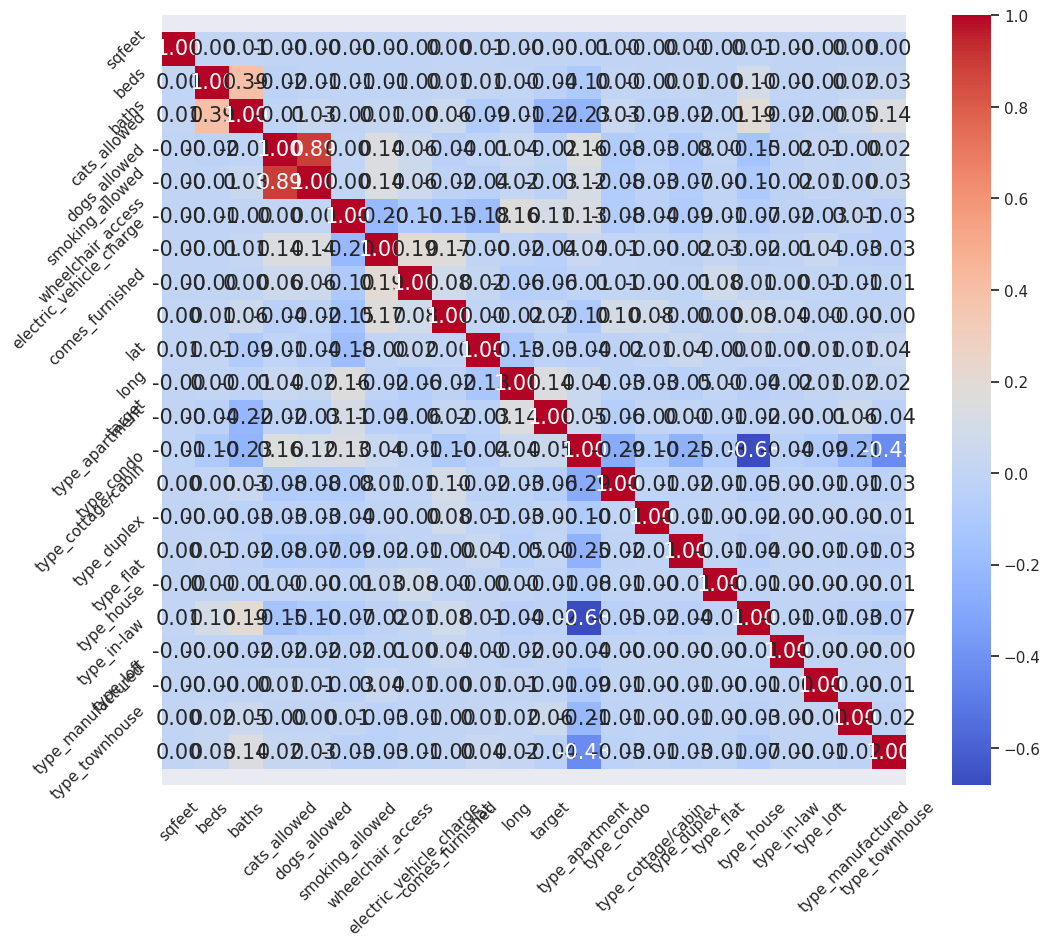

In [11]:
corr = train.corr()
plot_corre_heatmap(corr)

## Preparación de datos para el modelo 

Separo variables explicativas (x) del target (y)

In [12]:
# y son los valores que deseo predecir
y = np.array(train['target'])
y

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
# Remuevo el target de las variables explicativas
X = train.drop('target', axis=1)
X

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,type_apartment,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse
0,1200,2,2.0,1,1,1,0,0,0,43.5851,...,0,0,0,0,0,1,0,0,0,0
1,694,1,1.0,1,1,1,0,0,0,38.9137,...,1,0,0,0,0,0,0,0,0,0
2,900,2,2.0,0,0,1,0,0,0,36.7922,...,1,0,0,0,0,0,0,0,0,0
3,1469,3,2.0,1,1,1,0,0,0,33.5623,...,0,0,0,0,0,1,0,0,0,0
4,700,1,1.0,1,1,1,0,0,0,36.0595,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244790,1054,2,2.0,1,1,0,0,0,0,27.9523,...,1,0,0,0,0,0,0,0,0,0
244791,600,2,1.0,1,1,0,0,0,0,43.7198,...,1,0,0,0,0,0,0,0,0,0
244792,1099,2,2.0,1,1,1,0,0,0,32.6279,...,1,0,0,0,0,0,0,0,0,0
244793,1050,2,2.0,0,0,0,0,0,0,48.1995,...,1,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(244795, 21)

In [15]:
# Guardo los nombres de las variables explicativas para su posterior uso 
X_list= list(X.columns)
X_list

['sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'lat',
 'long',
 'type_apartment',
 'type_condo',
 'type_cottage/cabin',
 'type_duplex',
 'type_flat',
 'type_house',
 'type_in-law',
 'type_loft',
 'type_manufactured',
 'type_townhouse']

In [16]:
# Convierto a un array de numpy
X = np.array(X)
X

array([[1.200e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.940e+02, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.000e+02, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.099e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.050e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.350e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [17]:
# Uso scikit-learn para dividir los datos en set de training y testing
from sklearn.model_selection import train_test_split

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
# Verifico la forma de los datos de entrenamiento y testeo 
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

Training X Shape: (195836, 21)
Training y Shape: (195836,)
Testing X Shape: (48959, 21)
Testing y Shape: (48959,)


## Creo el modelo de ML 

En este caso mi modelo a utilizar será HistGradientBoostingClassifier, el cual es un "Histogram-based Gradient Boosting Classification Tree" el cual es un estimador muy rápido y útil para datasets grandes, además de que este modelo tiene soporte nativo para missing values (NaNs) lo que me permitió ingresar el dataset aún con missing values. 

In [20]:
# Importo el modelo a usar
from sklearn.ensemble import HistGradientBoostingClassifier

In [21]:
# Instancio el modelo 
hgbc = HistGradientBoostingClassifier( random_state = 42)

## Entrenamiento de modelo

In [22]:
# Entreno el modelo con los sets de entrenamiento
hgbc.fit(train_X, train_y)

HistGradientBoostingClassifier(random_state=42)

## Evaluación de modelo 

In [23]:
# Hago predicciones 
predictions = hgbc.predict(test_X)

In [24]:
# Importo métrica de evaluación  
from sklearn.metrics import accuracy_score

In [25]:
print(accuracy_score(test_y,predictions))

0.859801058028146


## Predicciones para enviar al datathon

Importo mi set de testeo anteriormente preparado

In [26]:
testeo = pd.read_csv(r'testeo.csv', header = 0)

In [27]:
# chequeo el dataset
testeo

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,type_apartment,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse
0,1344,3,2.0,0,0,1,0,0,0,42.5333,...,0,0,0,0,0,0,0,0,1,0
1,1050,2,1.0,0,0,1,0,0,0,43.9393,...,1,0,0,0,0,0,0,0,0,0
2,1150,2,2.0,1,1,1,1,0,0,42.2492,...,1,0,0,0,0,0,0,0,0,0
3,1280,2,2.5,1,1,0,0,0,0,40.5501,...,1,0,0,0,0,0,0,0,0,0
4,783,2,1.0,1,1,1,0,0,0,38.0936,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,1180,2,2.0,1,1,0,1,0,0,30.6197,...,1,0,0,0,0,0,0,0,0,0
38494,1138,3,2.0,1,1,1,0,0,0,31.8045,...,1,0,0,0,0,0,0,0,0,0
38495,743,1,1.0,1,1,1,0,0,0,27.8971,...,1,0,0,0,0,0,0,0,0,0
38496,1276,3,2.0,0,0,0,0,0,0,35.0052,...,0,0,0,0,0,1,0,0,0,0


In [28]:
testeo.shape

(38498, 21)

Procedo a transformar los datos a un array de numpy

In [29]:
testeo=np.array(testeo)
testeo

array([[1.344e+03, 3.000e+00, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.050e+03, 2.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.150e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [7.430e+02, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.276e+03, 3.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.870e+02, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [31]:
# hago predicciones
testeo_pred = hgbc.predict(testeo)

Finalmente preparo los datos para tener como producto final un archivo .csv de una sola columna 'pred' cuyo nombre del archivo sea mi usuario de github. 

In [32]:
pred = testeo_pred

In [33]:
pred = pd.DataFrame(pred)

In [34]:
pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [35]:
pred.columns

RangeIndex(start=0, stop=1, step=1)

In [36]:
pred.columns = ['pred']

In [37]:
pred.columns

Index(['pred'], dtype='object')

In [38]:
pred

,pred
0,0
1,0
2,0
3,0
4,0
...,...
38493,0
38494,0
38495,0
38496,0


In [39]:
# Por último exporto mi dataset  a un archivo en formato .csv con las predicciones
pred.to_csv('CharlyTrejo.csv', sep = ',', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a447a1df-46be-48c1-b429-5589ed0000e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>